In [19]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyLIMA.outputs import pyLIMA_plots
from cycler import cycler
sys.path.append(os.path.dirname(os.getcwd()))
from class_functions_roman_rubin import sim_events
import pickle


In [20]:
path_save_event = os.path.dirname(os.getcwd())+'/test_interval_width/sim_event/'
current_path = os.path.dirname(os.getcwd())
model='USBL'
path_save_sim= current_path+'/test_sim_fit/'
path_save_fit= current_path+'/test_sim_fit/'
path_ephemerides= current_path+'/ephemerides/Gaia.txt'
path_dataslice = current_path+'/opsims/baseline/dataSlice.npy'
path_TRILEGAL_set= current_path+'/TRILEGAL/PB_planet_split_1.csv'
i=18
data_trilegal = pd.read_csv(path_TRILEGAL_set)
data = data_trilegal.iloc[int(i)]
event = sim_events(model, path_ephemerides, path_dataslice, data, i, path_save_sim, path_save_fit)
ZP = {'W149':27.615, 'u':27.03, 'g':28.38, 'r':28.16, 'i':27.85, 'z':27.46, 'y':26.68}

with open(path_save_event+"Event_18.pkl", "wb") as archivo:
    pickle.dump(event, archivo)


In [21]:

with open(path_save_event+"Event_18.pkl", "rb") as archivo:
    evento_restaurado = pickle.load(archivo)

print(evento_restaurado) 


evento_restaurado.ulens_params()

{'t0': 2462592.427461098,
 'u0': 0.1474368375383864,
 'tE': 351.03436333528964,
 'rho': 9.353665605734084e-05,
 's': 1.1478599290943858,
 'q': 0.0004842690847154,
 'alpha': 2.170221123244217,
 'piEN': 0.0058858226795134,
 'piEE': -0.0320152930579978}

In [22]:
new_creation, my_own_model = evento_restaurado.sim_event()
with open(path_save_event+"my_own_model_18.pkl", "wb") as archivo:
    pickle.dump(my_own_model, archivo)
with open(path_save_event+"new_creation_18.pkl", "wb") as archivo:
    pickle.dump(new_creation, archivo)


/home/anibal/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 20736 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 20736 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "

Parallax(Full) estimated for the telescope W149: SUCCESS
Parallax(Full) estimated for the telescope u: SUCCESS
Parallax(Full) estimated for the telescope g: SUCCESS
Parallax(Full) estimated for the telescope r: SUCCESS
Parallax(Full) estimated for the telescope i: SUCCESS
Parallax(Full) estimated for the telescope z: SUCCESS
Parallax(Full) estimated for the telescope y: SUCCESS


In [23]:
with open(path_save_event+"my_own_model_18.pkl", "rb") as archivo:
    my_own_model_rest = pickle.load(archivo)


In [24]:
decision = event.criteria_save(my_own_model_rest)


A good event to fit


In [25]:
# if decision:
tel_roman = event.tel_roman_fit(my_own_model_rest)
tel_rr = event.tel_rr_fit(my_own_model_rest)


with open(path_save_event+"tel_roman_18.pkl", "wb") as archivo:
    pickle.dump(tel_roman, archivo)
with open(path_save_event+"tel_rr_18.pkl", "wb") as archivo:
    pickle.dump(tel_rr, archivo)




check_event  : Everything looks fine...
check_event  : Everything looks fine...


In [26]:
with open(path_save_event+"tel_roman_18.pkl", "rb") as archivo:
    tel_roman_rest = pickle.load(archivo)

with open(path_save_event+"tel_rr_18.pkl", "rb") as archivo:
    tel_rr_rest = pickle.load(archivo)

In [27]:
# !pip install dill


In [28]:
# import os

# file_path = '/home/anibal-pc/roman_rubin/test_interval_width/fit_rr_18_0_0001.pkl'
# if os.path.exists(file_path):
#     print("El archivo existe.")
# else:
#     print("El archivo no existe.")


# with open(file_path, "rb") as archivo:
#     # print(archivo)
#     fit_rr = pickle.load(archivo)

In [29]:
# import os

# pkl_files = [f for f in os.listdir(os.path.dirname(os.getcwd())+'/test_interval_width') if 'pkl' in f]
# # print(os.path.dirname(os.getcwd())+'/test_interval_width/'+pkl_files[0])


# # j=2

# cov_matrix = []
# best_model = []
# chi_results = []
# ranges = []

# for j in range(len(pkl_files)):
#     # print(os.path.dirname(os.getcwd())+'/test_interval_width/'+pkl_files[j])
    
#     with open(file_path, "rb") as archivo:
#         # print(archivo)
#         fit_rr = pickle.load(archivo)
        
    # cov_matrix.append(fit_rr.fit_results['covariance_matrix'])
    # best_model.append(fit_rr.fit_results['best_model'])
    # chi_results.append(fit_rr.fit_results['chi2'])
    
    # indx0 = pkl_files[j].index('_18')
    # indx1 = pkl_files[j].index('.pkl')
    # rango = float(pkl_files[j][indx0+4:indx1])
    
    # ranges.append(rango)



In [30]:
with open(path_save_event+"tel_rr_18.pkl", "rb") as archivo:
    tel_rr_rest = pickle.load(archivo)

In [31]:

# algo = 'TRF'

# cov_matrix = []
# best_model = []
# chi_results = []

# for rango in np.logspace(-4,1,30):
#     # fit_roman = event.fit_event(tel_roman, rango, algo)
#     fit_rr = event.fit_event(tel_rr, rango, algo)
#     # results_rr.append(fit_rr)
#     cov_matrix.append(fit_rr.fit_results['covariance_matrix'])
#     best_model.append(fit_rr.fit_results['best_model'])
#     chi_results.append(fit_rr.fit_results['chi2'])
        

In [32]:
import h5py
def leer_de_h5(file_name):
    with h5py.File(file_name, 'r') as archivo_h5:
        matriz = archivo_h5['covariance_matrix'][:]
        array = archivo_h5['best_model'][:]
        lista = archivo_h5.attrs['rango']
        flotante = archivo_h5.attrs['chi2']
    return matriz, array, lista, flotante



h5_files = [f for f in os.listdir(os.path.dirname(os.getcwd())+'/test_interval_width/') if 'h5' in f]
print(len(h5_files))

key_params = ['t0','u0','tE', 'rho', 's','q','alpha','piEN', 'piEE']
chi2_results = []
met_3 = {key: [] for key in key_params}
met_2 = {key: [] for key in key_params}
met_1 = {key: [] for key in key_params}
width = []

matriz, best_model, rango, chi2 = leer_de_h5(os.path.dirname(os.getcwd())+'/test_interval_width/'+h5_files[0])
dof = int(tel_rr_rest.total_number_of_data_points()-len(best_model))
# dof
true_values = evento_restaurado.ulens_params()
for j in range(len(h5_files)):
    matriz, best_model, rango, chi2 = leer_de_h5(os.path.dirname(os.getcwd())+'/test_interval_width/'+h5_files[j])
    # k = 2
    for k in range(len(key_params)):
        sigma= np.sqrt(np.diag(matriz))[0:9][k]
        # best_model= 
        met_3[key_params[k]].append(sigma/best_model[0:9][k])
        met_2[key_params[k]].append(np.abs(best_model[0:9][k] - true_values[key_params[k]]) /sigma)
        met_1[key_params[k]].append(np.abs(best_model[0:9][k] - true_values[key_params[k]]) / abs(true_values[key_params[k]]))
    width.append(rango)
    chi2_results.append(chi2/dof)
   
    # met_3.append(sigma/best_model)

26


In [33]:
# for key in key_params:
#     plt.figure(figsize=(8, 6))
    
#     scatter = plt.scatter(width, met_3[key], c=chi2_results, cmap='viridis',s=50)
#     plt.plot(width, met_3[key], ls='',lw=0.5)
#     plt.colorbar(scatter, label=r'$\chi^2/dof$')  # Add a colorbar
#     plt.xscale('log')
#     # Add labels and title
#     plt.xlabel('Width interval / true value')
#     plt.ylabel(r'$\sigma/fit$')
#     plt.title(key)
    
#     # Show the plot
#     plt.show()

/tmp/ipykernel_613913/1680950366.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


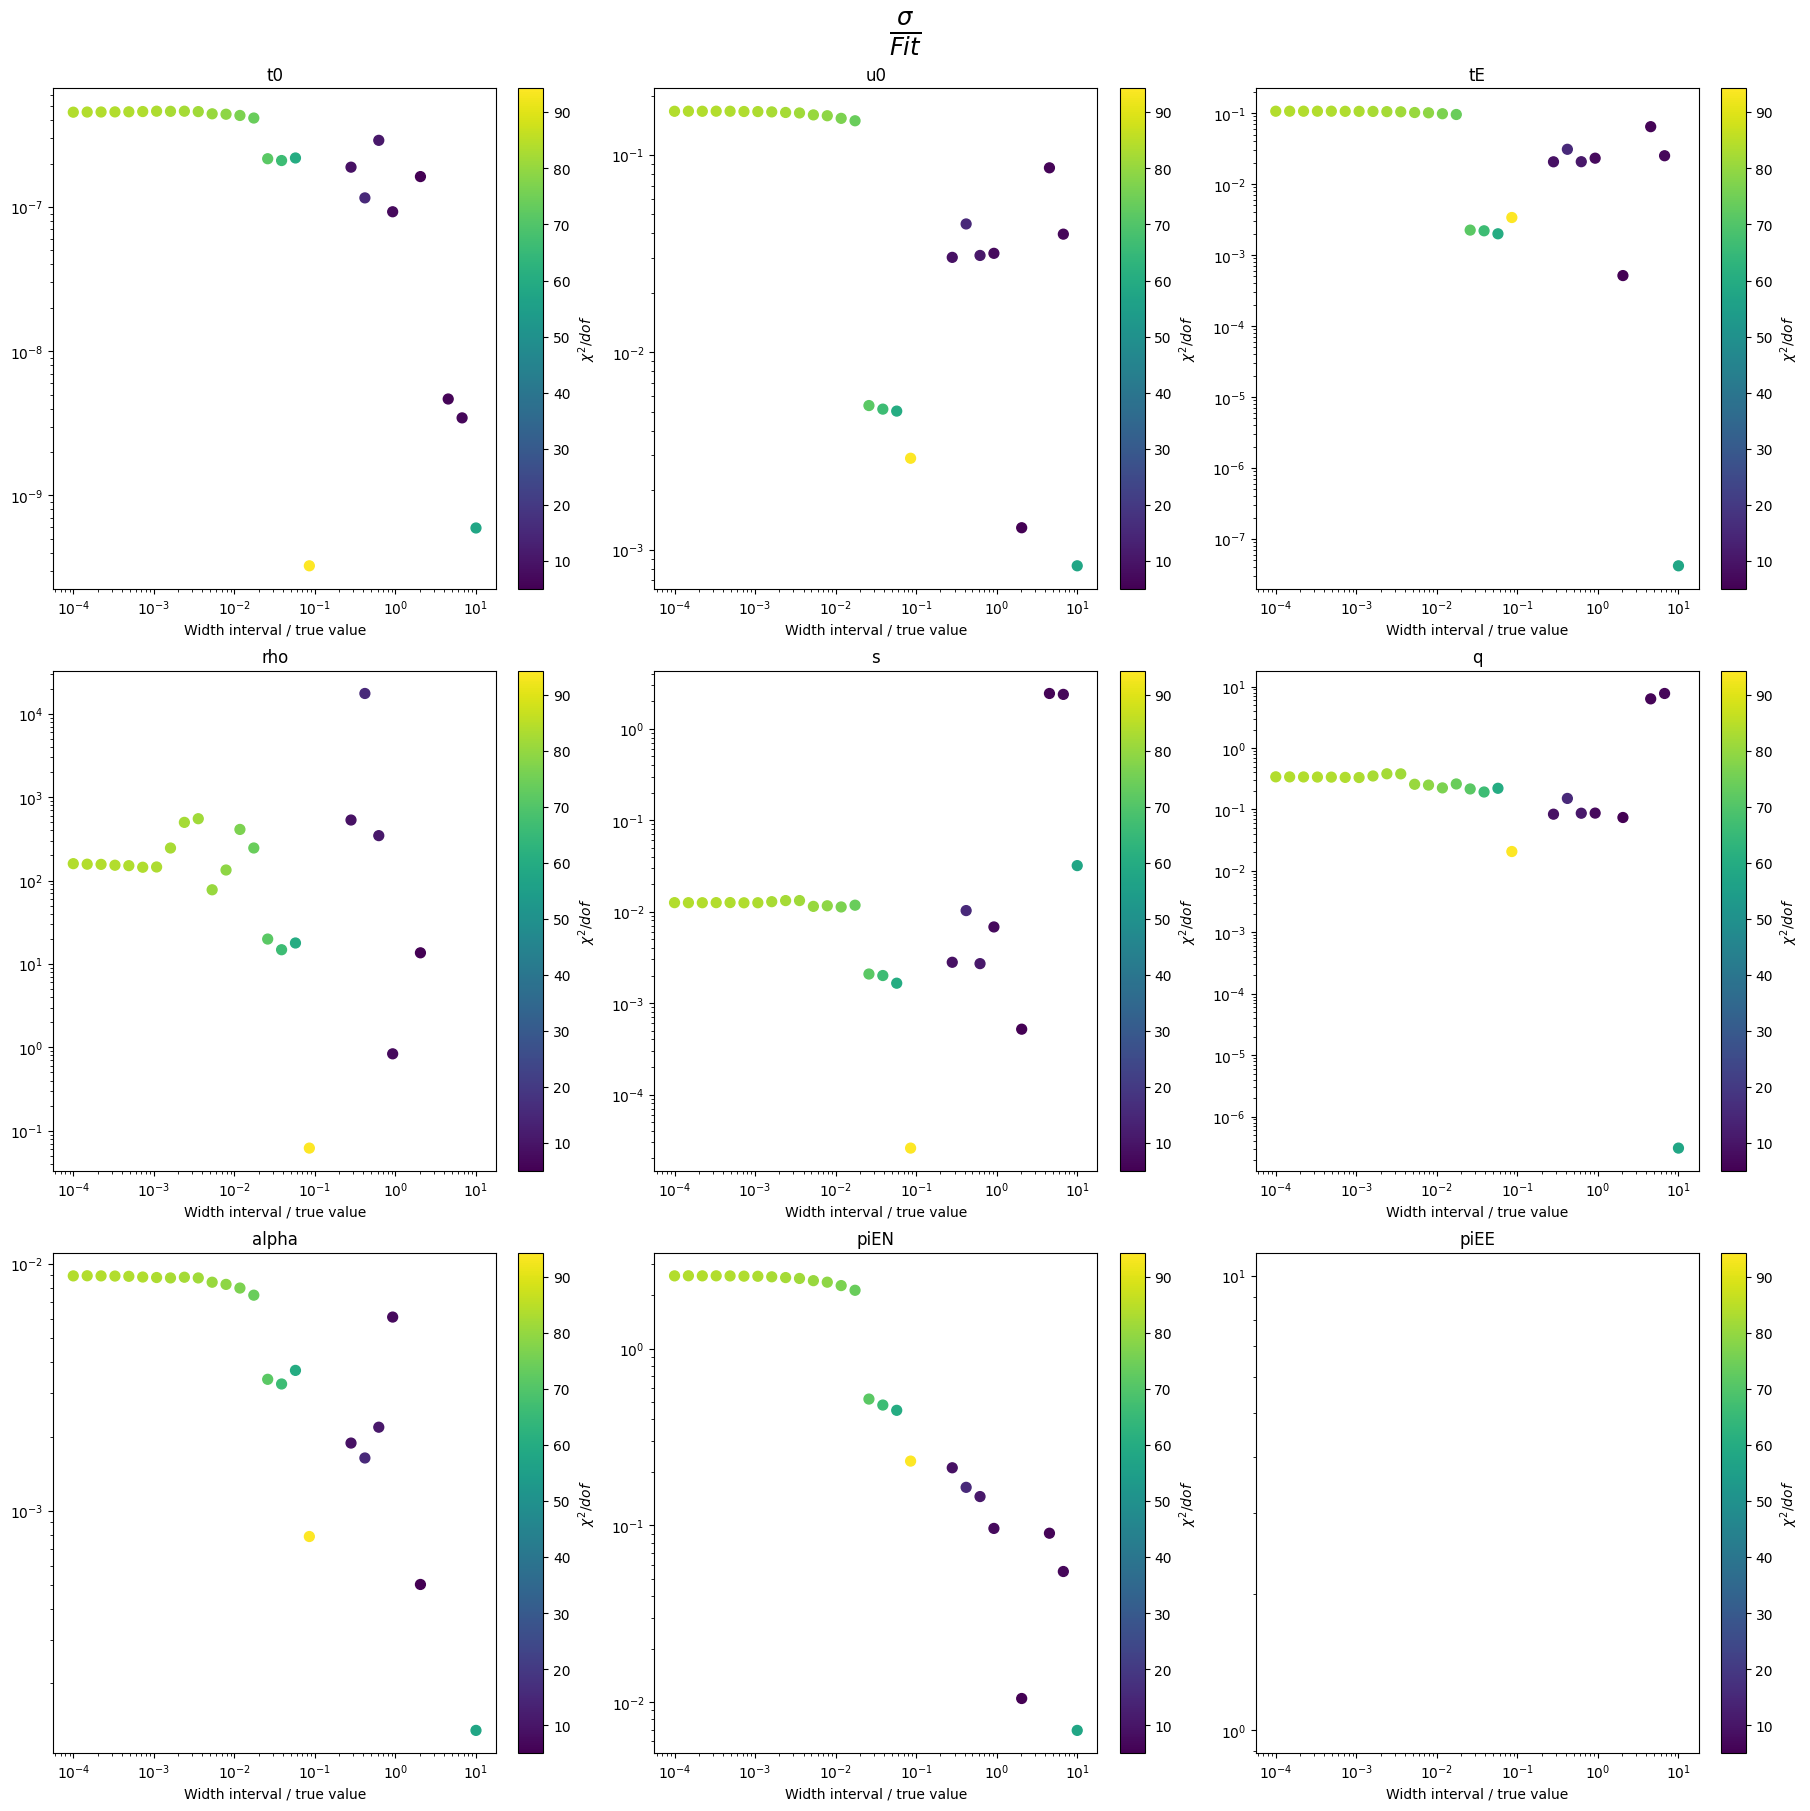

In [34]:
# Create a grid of subplots
n_cols = 3
n_rows = -(-len(key_params) // n_cols)  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), constrained_layout=True)
axes = axes.flatten()  # Flatten axes for easy indexing

# Plot each key in the grid
for idx, key in enumerate(key_params):
    ax = axes[idx]
    scatter = ax.scatter(width, met_3[key], c=chi2_results, cmap='viridis', s=50)
    ax.plot(width, met_3[key], ls='', lw=0.5)
    ax.set_xscale('log')
    ax.set_yscale('log')
    # Add labels, title, and colorbar
    ax.set_xlabel('Width interval / true value')
    # ax.set_ylabel(r'$\sigma/fit$')
    ax.set_title(key)
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(r'$\chi^2/dof$')

# Hide any unused subplots
for ax in axes[len(key_params):]:
    ax.set_visible(False)
plt.suptitle(r"$\frac{\sigma}{Fit}$", fontsize=25)
# Show the grid of plots
plt.show()

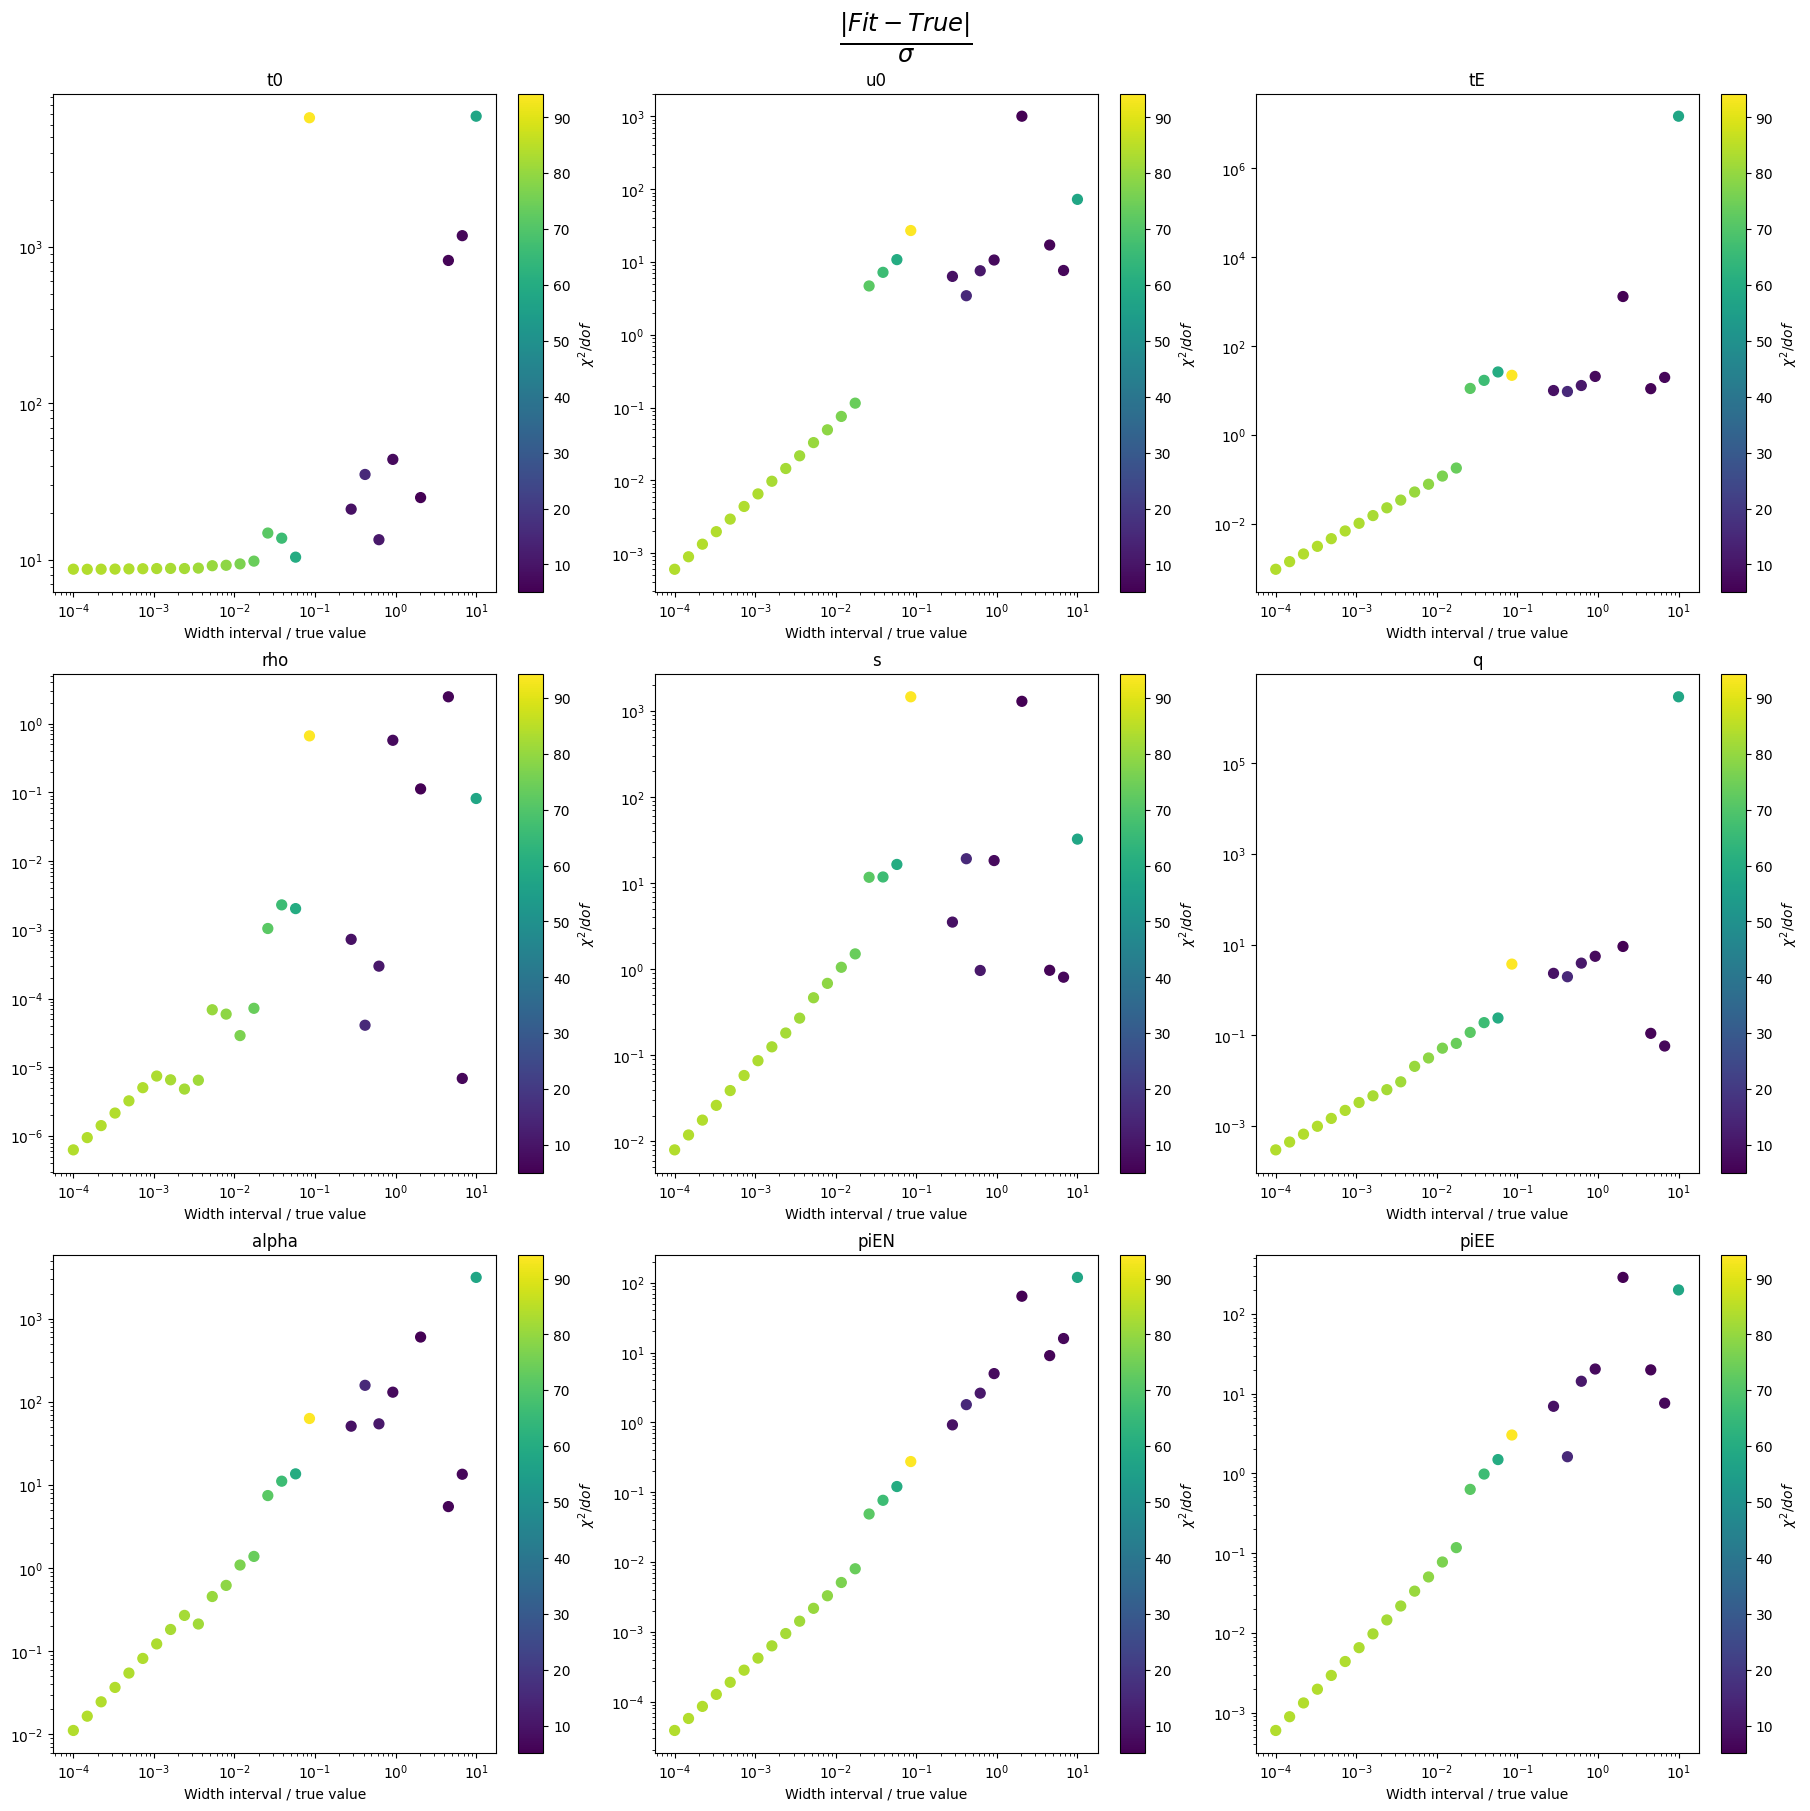

In [35]:
n_cols = 3
n_rows = -(-len(key_params) // n_cols)  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), constrained_layout=True)
axes = axes.flatten()  # Flatten axes for easy indexing

# Plot each key in the grid
for idx, key in enumerate(key_params):
    ax = axes[idx]
    scatter = ax.scatter(width, met_2[key], c=chi2_results, cmap='viridis', s=50)
    ax.plot(width, met_2[key], ls='', lw=0.5)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    # Add labels, title, and colorbar
    ax.set_xlabel('Width interval / true value')
    # ax.set_ylabel(r'$\sigma/fit$')
    ax.set_title(key)
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(r'$\chi^2/dof$')

# Hide any unused subplots
for ax in axes[len(key_params):]:
    ax.set_visible(False)
plt.suptitle(r"$\frac{|Fit-True|}{\sigma}$", fontsize=25)
# Show the grid of plots
plt.show()

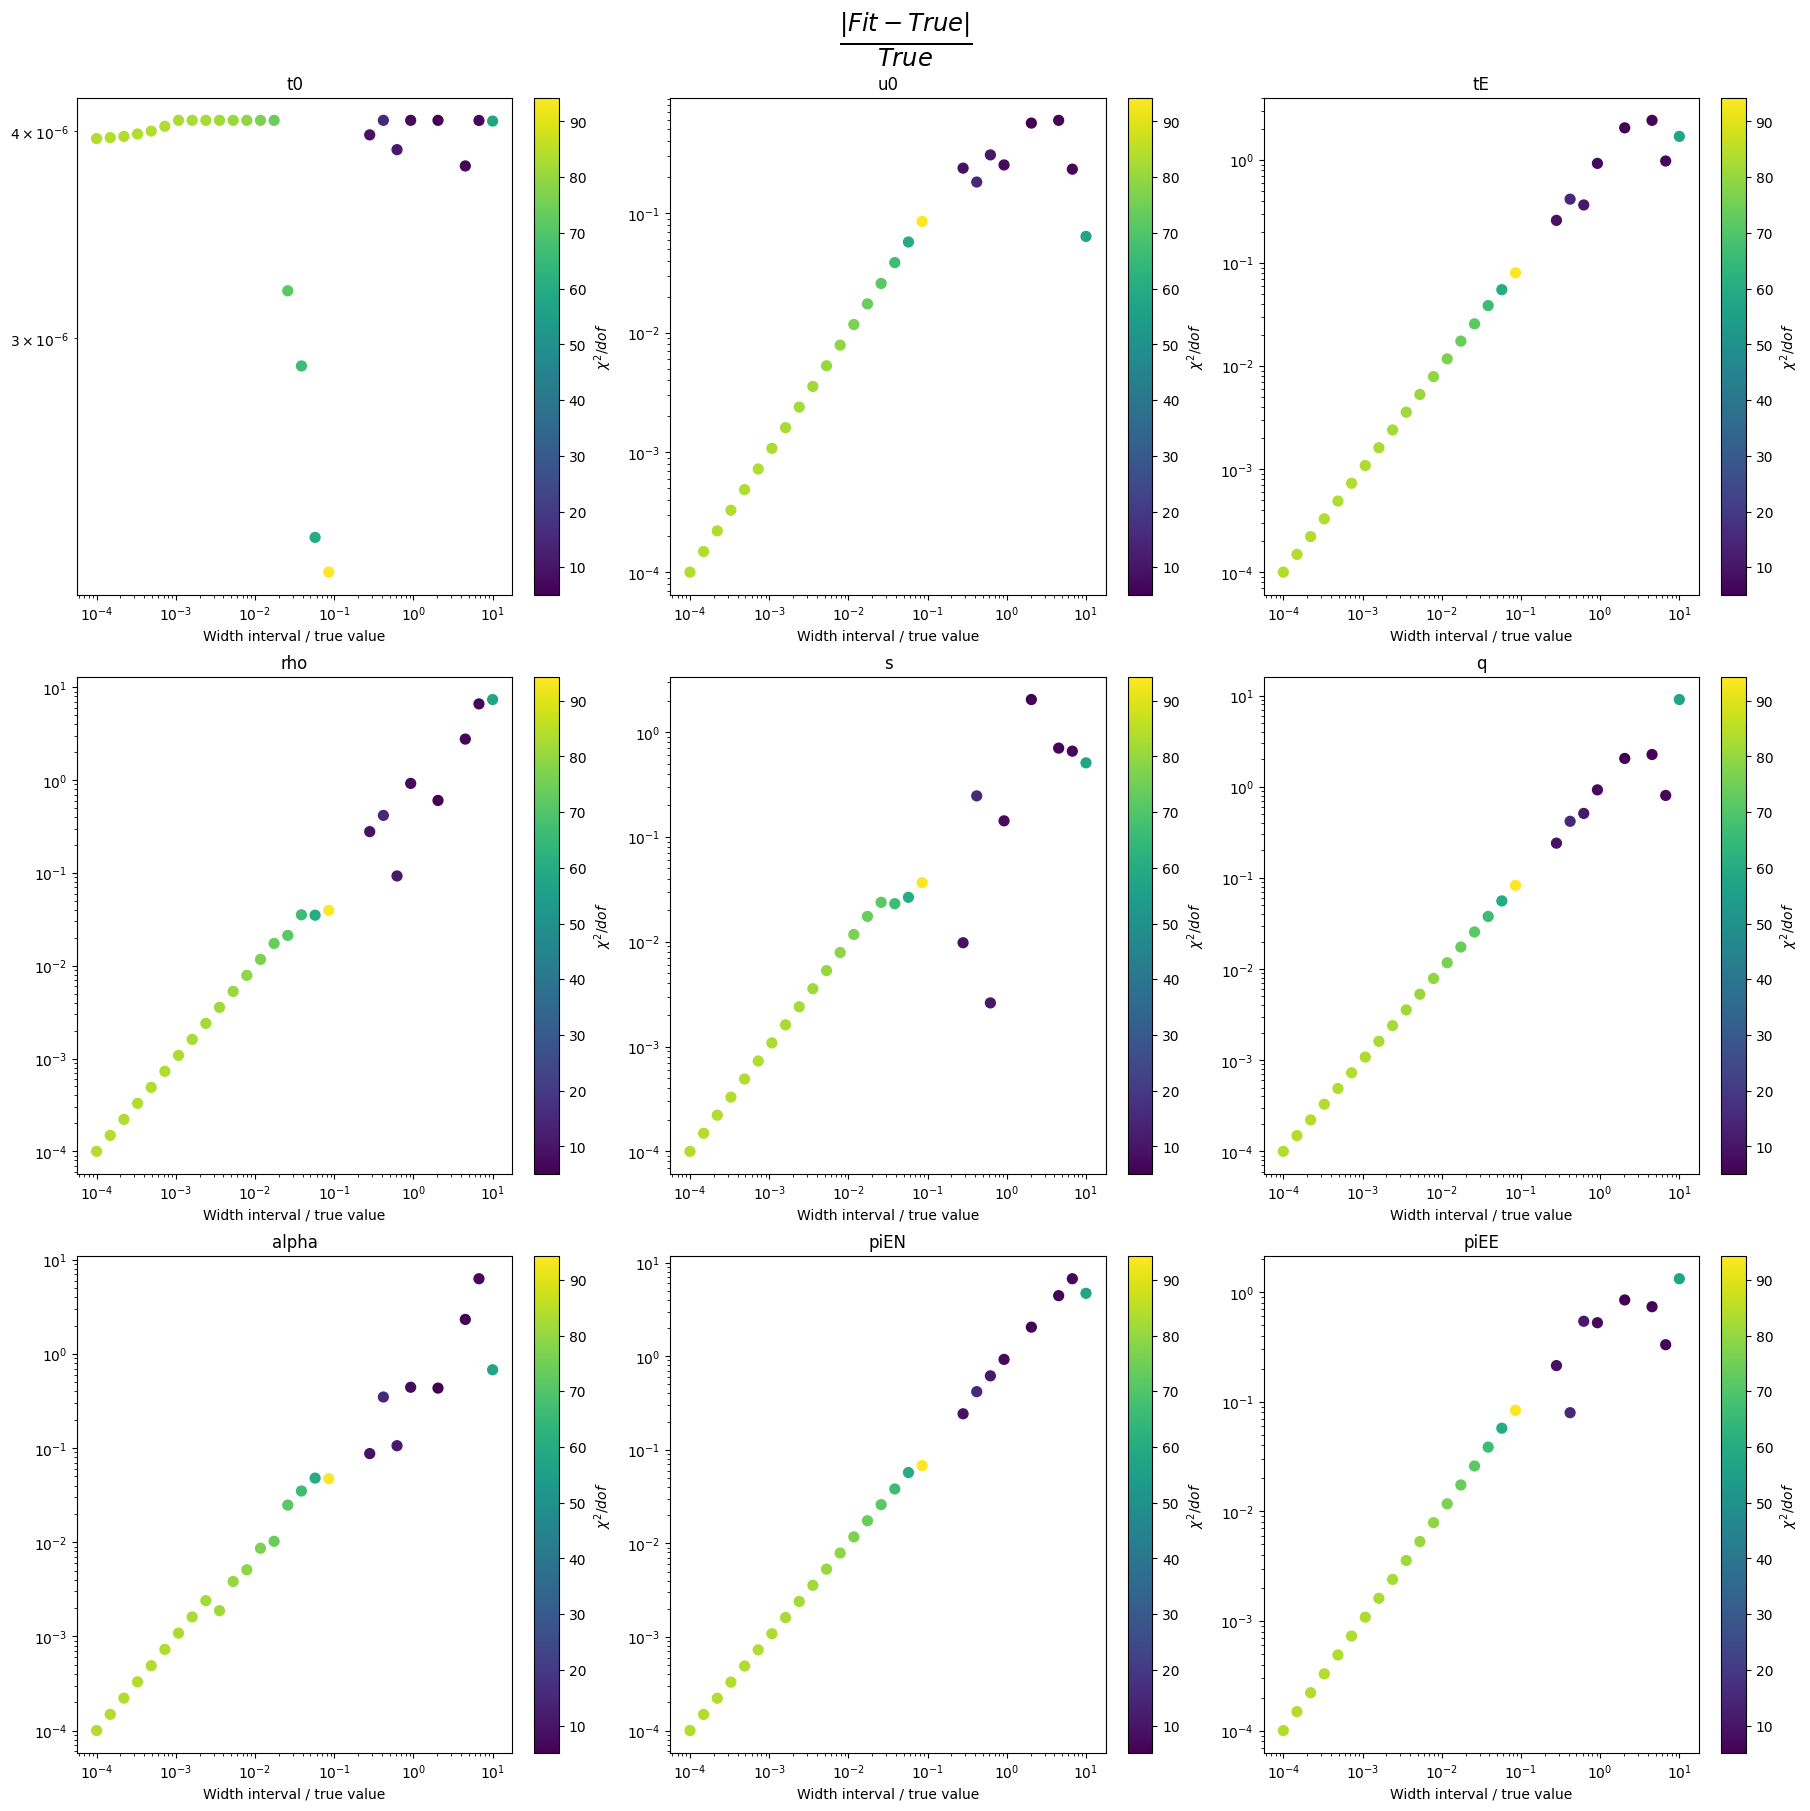

In [36]:
n_cols = 3
n_rows = -(-len(key_params) // n_cols)  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), constrained_layout=True)
axes = axes.flatten()  # Flatten axes for easy indexing

# Plot each key in the grid
for idx, key in enumerate(key_params):
    ax = axes[idx]
    scatter = ax.scatter(width, met_1[key], c=chi2_results, cmap='viridis', s=50)
    ax.plot(width, met_1[key], ls='', lw=0.5)
    ax.set_xscale('log')
    ax.set_yscale('log')
    # Add labels, title, and colorbar
    ax.set_xlabel('Width interval / true value')
    # ax.set_ylabel(r'$\sigma/fit$')
    ax.set_title(key)
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(r'$\chi^2/dof$')

# Hide any unused subplots
for ax in axes[len(key_params):]:
    ax.set_visible(False)

# Show the grid of plots
# plt.suptitle('')

# fig.text(0.5, 0.01, "Width of interval", ha='center', fontsize=25)
plt.suptitle(r"$\frac{|Fit-True|}{True}$", fontsize=25)
# plt.tight_layout(rect=[0.05, 0.05, 1, 0.95]) 
plt.show()